### Using a dataset from sports statistics (e.g., NBA, MLB), develop a predictive model that forecasts the outcome of games or player performances based on historical data. Apply Pandas for data manipulation, NumPy for numerical computations, and Matplotlib for visualizing the model’s predictions compared to actual outcomes.

-----

### Importing Required Libraries

In [210]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 544.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 391.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 391.3 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 409.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 345.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 345.6 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 327.3 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 327.3 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 294.1 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 294.1 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/2

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [198]:
games_data = pd.DataFrame(pd.read_csv("games.csv"))

In [150]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [152]:
games_data.shape

(26651, 21)

In [153]:
games_data.head(10)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
5,2022-12-21,22200469,Final,1610612738,1610612754,2022,1610612738,112.0,0.386,0.840,...,26.0,62.0,1610612754,117.0,0.469,0.778,0.462,27.0,47.0,0
6,2022-12-21,22200470,Final,1610612751,1610612744,2022,1610612751,143.0,0.643,0.875,...,42.0,32.0,1610612744,113.0,0.494,0.760,0.364,32.0,36.0,1
7,2022-12-21,22200471,Final,1610612752,1610612761,2022,1610612752,106.0,0.553,0.611,...,25.0,38.0,1610612761,113.0,0.447,0.909,0.265,17.0,38.0,0
8,2022-12-21,22200472,Final,1610612745,1610612753,2022,1610612745,110.0,0.466,0.647,...,22.0,49.0,1610612753,116.0,0.451,0.697,0.297,19.0,45.0,0
9,2022-12-21,22200473,Final,1610612750,1610612742,2022,1610612750,99.0,0.494,0.700,...,23.0,39.0,1610612742,104.0,0.453,0.852,0.333,17.0,39.0,0


In [155]:
games_data.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [157]:
np.unique(games_data['GAME_STATUS_TEXT'])

array(['Final'], dtype=object)

#### Story that the data reveals:

1. It seems `GAME_STATUS_TEXT` variable is holding same value `Final` in all tuples. So it can be neglected from **games_data**
2. `HOME_TEAM_ID` and `TEAM_ID_home` preserving the same information. So any one of them can be neglected in **games_data**

Considerable Attributes for analysis/prediction: (Variable Selection) 


2. `PTS_home`
3. `FG_PCT_home`
4. `FT_PCT_home`
5. `AST_home`
6. `REB_home`
7. `PTS_away`
8. `FG_PCT_away`
9. `FT_PCT_away`
10. `FG3_PCT_away`
11. `AST_away`
12. `REB_away`
13. `HOME_TEAM_WINS`

#### Subsetting Required data:

In [199]:
data = games_data[["PTS_home","FG_PCT_home","FT_PCT_home", "AST_home", "REB_home" ,"PTS_away", "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away", "HOME_TEAM_WINS"]]
data

,PTS_home,FG_PCT_home,FT_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,126.0,0.484,0.926,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,120.0,0.488,0.952,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,114.0,0.482,0.786,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,113.0,0.441,0.909,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,108.0,0.429,1.000,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26646,93.0,0.419,0.821,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,81.0,0.338,0.719,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,98.0,0.448,0.682,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,99.0,0.440,0.771,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


In [165]:
data.describe()

,PTS_home,FG_PCT_home,FT_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26651.000000
mean,103.455898,0.460735,0.760377,22.823441,43.374284,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.587032
std,13.283370,0.056676,0.100677,5.193308,6.625769,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.492376
min,36.000000,0.250000,0.143000,6.000000,15.000000,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,94.000000,0.422000,0.697000,19.000000,39.000000,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,103.000000,0.460000,0.765000,23.000000,43.000000,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,112.000000,0.500000,0.833000,26.000000,48.000000,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,168.000000,0.684000,1.000000,50.000000,72.000000,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


### Data Cleaning:

#### Checking for Null values

In [178]:
data[data.isnull()].count()

PTS_home          0
FG_PCT_home       0
FT_PCT_home       0
AST_home          0
REB_home          0
PTS_away          0
FG_PCT_away       0
FT_PCT_away       0
FG3_PCT_away      0
AST_away          0
REB_away          0
HOME_TEAM_WINS    0
dtype: int64

So there are no missing values in the data set

#### Checking for duplicated records

In [190]:
data.duplicated().sum()

105

**Dropping Duplicated Values**

105 duplicate entries present. Let us remove them using `drop_duplicates()` function

In [200]:
data = data.drop_duplicates()
data

,PTS_home,FG_PCT_home,FT_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,126.0,0.484,0.926,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,120.0,0.488,0.952,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,114.0,0.482,0.786,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,113.0,0.441,0.909,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,108.0,0.429,1.000,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26646,93.0,0.419,0.821,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,81.0,0.338,0.719,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,98.0,0.448,0.682,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,99.0,0.440,0.771,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


#### Checking Datatype of variables

In [194]:
data.dtypes

PTS_home          float64
FG_PCT_home       float64
FT_PCT_home       float64
AST_home          float64
REB_home          float64
PTS_away          float64
FG_PCT_away       float64
FT_PCT_away       float64
FG3_PCT_away      float64
AST_away          float64
REB_away          float64
HOME_TEAM_WINS      int64
dtype: object

There is no problem with the datatype

### Reducing the number of variable

Computing mean for matches palyed from home & away and preserving them in `PTS`, `FG_PCT`, `FT_PCT`, `AST`, `REB` thereby reducing half of column shape 

In [201]:
data["PTS"] = (data["PTS_home"] + data["PTS_away"])/2
data["FG_PCT"] = (data["FG_PCT_home"] + data["FG_PCT_away"])/2
data["FT_PCT"] = (data["FT_PCT_home"] + data["FT_PCT_away"])/2
data["AST"] = (data["AST_home"] + data["AST_away"])/2
data["REB"] = (data["REB_home"] + data["REB_away"])/2
data

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5720\2309047982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PTS"] = (data["PTS_home"] + data["PTS_away"])/2
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5720\2309047982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["FG_PCT"] = (data["FG_PCT_home"] + data["FG_PCT_away"])/2
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5720\2309047982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,PTS_home,FG_PCT_home,FT_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,PTS,FG_PCT,FT_PCT,AST,REB
0,126.0,0.484,0.926,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1,121.5,0.4810,0.8705,24.0,45.0
1,120.0,0.488,0.952,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1,116.0,0.5245,0.8585,18.0,38.5
2,114.0,0.482,0.786,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1,110.0,0.4760,0.7340,21.0,41.5
3,113.0,0.441,0.909,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1,103.0,0.4165,0.8220,21.0,47.5
4,108.0,0.429,1.000,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0,109.0,0.4645,0.8865,21.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,93.0,0.419,0.821,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1,90.0,0.3925,0.7320,20.5,46.5
26647,81.0,0.338,0.719,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0,83.0,0.3745,0.6775,17.5,43.5
26648,98.0,0.448,0.682,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1,96.5,0.4175,0.6705,24.0,44.0
26649,99.0,0.440,0.771,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1,96.5,0.4545,0.7480,19.5,37.5


Now, we can remove the attributes that are no longer needed for our analysis

In [202]:
data = data.drop(data.columns[[0,1,2,3,4,5,6,7,9,10]], axis = 1)
data

,FG3_PCT_away,HOME_TEAM_WINS,PTS,FG_PCT,FT_PCT,AST,REB
0,0.321,1,121.5,0.4810,0.8705,24.0,45.0
1,0.333,1,116.0,0.5245,0.8585,18.0,38.5
2,0.433,1,110.0,0.4760,0.7340,21.0,41.5
3,0.261,1,103.0,0.4165,0.8220,21.0,47.5
4,0.292,0,109.0,0.4645,0.8865,21.0,47.0
...,...,...,...,...,...,...,...
26646,0.375,1,90.0,0.3925,0.7320,20.5,46.5
26647,0.267,0,83.0,0.3745,0.6775,17.5,43.5
26648,0.500,1,96.5,0.4175,0.6705,24.0,44.0
26649,0.385,1,96.5,0.4545,0.7480,19.5,37.5


#### Renaming columns to our convinent

In [235]:
data = data.rename(columns={"HOME_TEAM_WINS" : "RESULT","FG3_PCT_away" : "FG3_PCT" })
data

,FG3_PCT,RESULT,PTS,FG_PCT,FT_PCT,AST,REB
0,0.321,1,121.5,0.4810,0.8705,24.0,45.0
1,0.333,1,116.0,0.5245,0.8585,18.0,38.5
2,0.433,1,110.0,0.4760,0.7340,21.0,41.5
3,0.261,1,103.0,0.4165,0.8220,21.0,47.5
4,0.292,0,109.0,0.4645,0.8865,21.0,47.0
...,...,...,...,...,...,...,...
26646,0.375,1,90.0,0.3925,0.7320,20.5,46.5
26647,0.267,0,83.0,0.3745,0.6775,17.5,43.5
26648,0.500,1,96.5,0.4175,0.6705,24.0,44.0
26649,0.385,1,96.5,0.4545,0.7480,19.5,37.5


In [236]:
data[data.isnull()].count()

FG3_PCT    0
RESULT     0
PTS        0
FG_PCT     0
FT_PCT     0
AST        0
REB        0
dtype: int64

### Checking for outliers

C:\Users\ELCOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


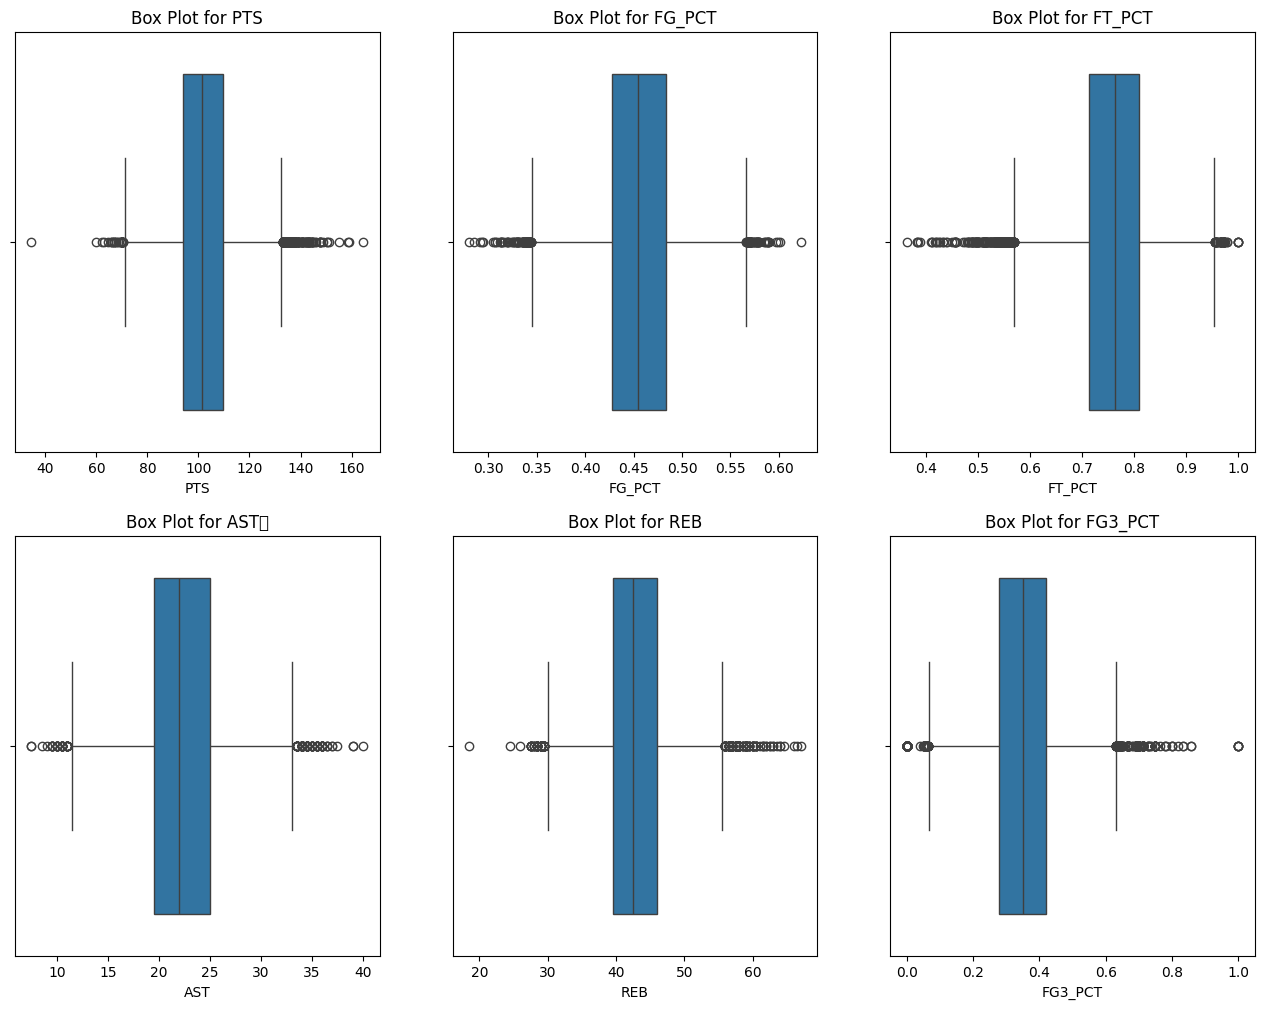

In [238]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x='PTS', data=data)
plt.title('Box Plot for PTS')

plt.subplot(2, 3, 2)
sns.boxplot(x='FG_PCT', data=data)
plt.title('Box Plot for FG_PCT')

plt.subplot(2, 3, 3)
sns.boxplot(x='FT_PCT', data=data)
plt.title('Box Plot for FT_PCT')

plt.subplot(2, 3, 4)
sns.boxplot(x='AST', data=data)
plt.title('Box Plot for AST')

plt.subplot(2, 3, 5)
sns.boxplot(x='REB', data=data)
plt.title('Box Plot for REB')

plt.subplot(2, 3, 6)
sns.boxplot(x='FG3_PCT', data=data)
plt.title('Box Plot for FG3_PCT')


plt.show()


Significant amount of Outliers not noted. It seems one or two data lies far apart from other data points.

Text(0.5, 1.0, 'Win vs Lose Count')

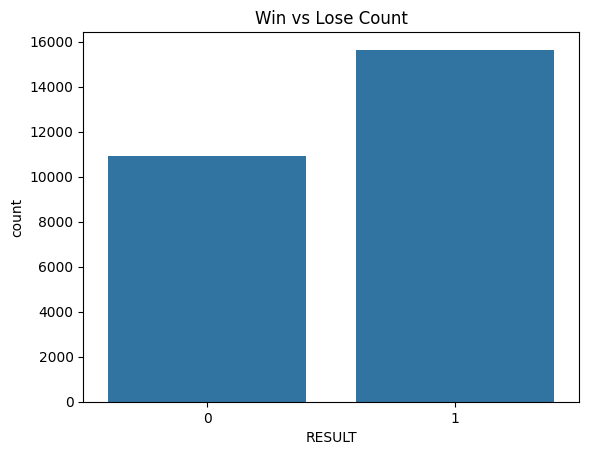

In [248]:
sns.countplot(x="RESULT", data=data)
plt.title("Win vs Lose Count")

Win is higher than lose

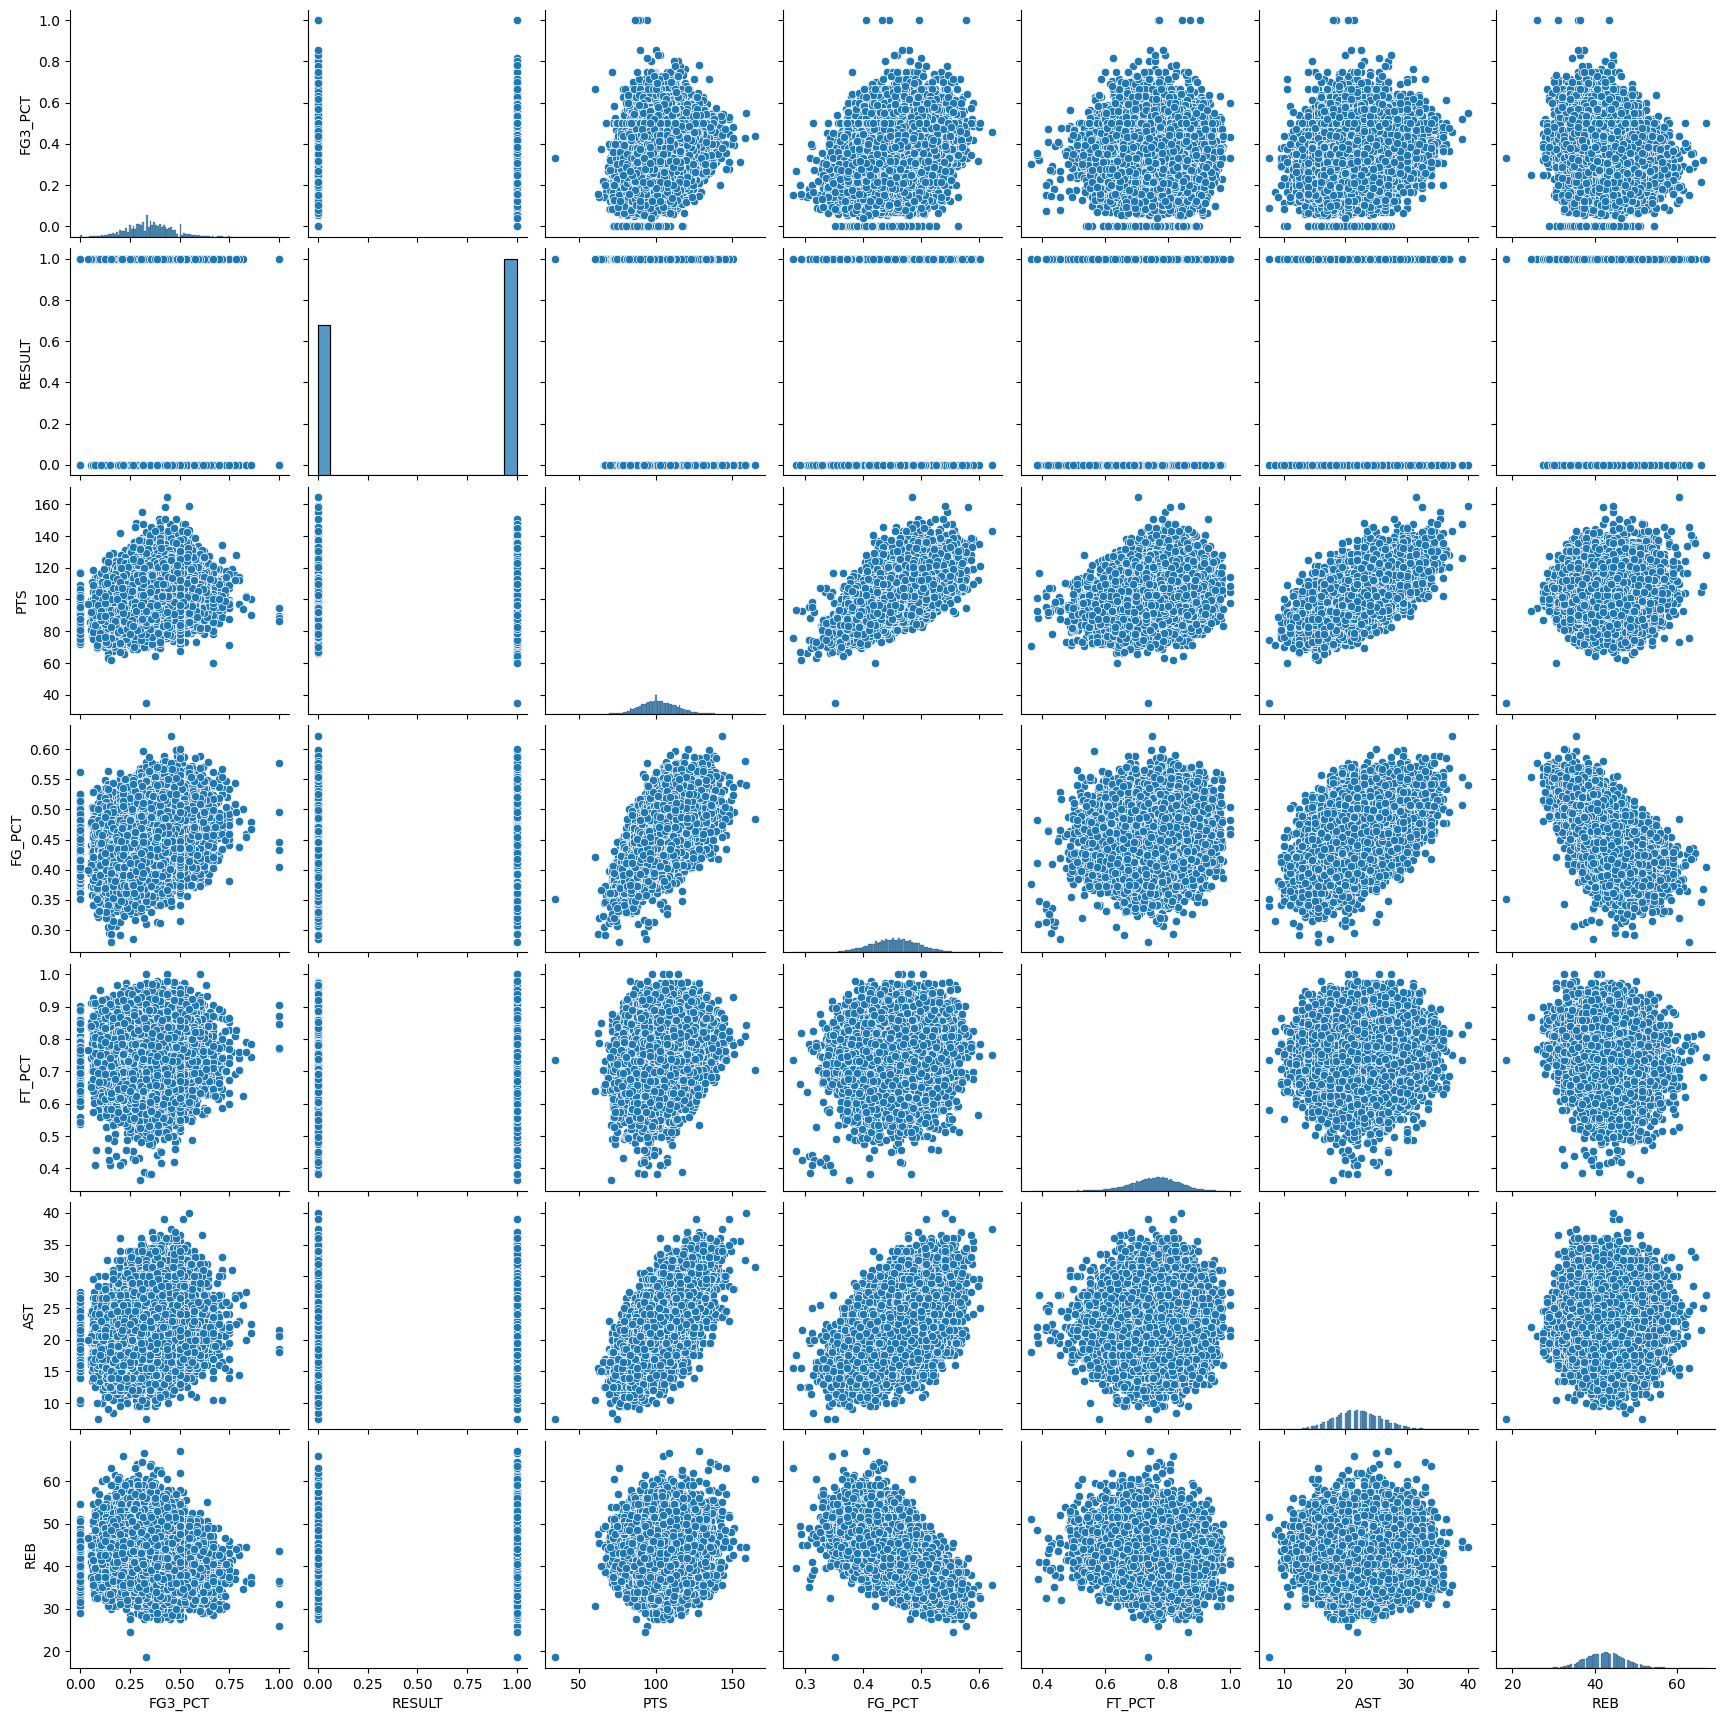

In [244]:
sns.pairplot(data)